In [1]:
using Crystalline, MPBUtils, JLD2, LinearAlgebra, StaticArrays, SymmetryBases, PyPlot, DelimitedFiles, PrettyTables
using PyCall
np = pyimport("numpy")
using HDF5; 
include("symeigs/corner_charges.jl")

polarization_sg12 (generic function with 2 methods)

In [231]:
# We analyze c6 symmetry

In [65]:
sg = 16; id_eps=3; mode="te"
dispersion_dir = "./dispersions/output/sg$sg/eps$(id_eps)/$mode/";
loaded_dispersion_data = load(dispersion_dir*"sg$sg-epsid$(id_eps)-res64-$mode.jld2")
marginsv = loaded_dispersion_data["marginsv"];
cumsummariesv = loaded_dispersion_data["cumsummariesv"];
dispersionsv = loaded_dispersion_data["dispersionsv"];

In [73]:
clad_dispersion = dispersionsv[275]
bulk_dispersion = dispersionsv[8080];
clad_summaries = cumsummariesv[275]
bulk_summaries = cumsummariesv[8080];

In [94]:
kpoints = [collect(row) for row in eachrow(readdlm("./dispersions/output/sg13/eps3/te/dim2-sg13-23510-res64-te-dispersion.out", ',')[:, 2:4])]
gamma_idx = findall(x -> isapprox(x, [0.3333, 0.333, 0], atol=1e-3), kpoints)

1-element Vector{Int64}:
 17

In [111]:
bands_c6 = readdlm("./corner_charge_supercells/output/dim2-sg16-28080-res16-te-supercell-corner-dispersion-1.out", ',')[:, 6:end];

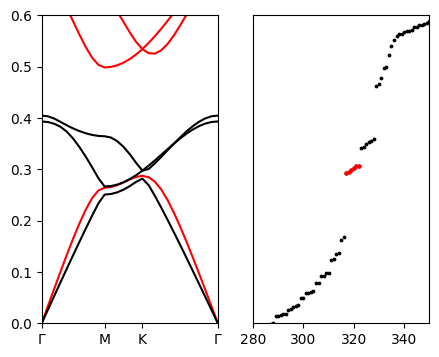

(Any[], Any[])

In [133]:
figure(figsize=(5, 4))
subplot(1, 2, 1)
plot(clad_dispersion, color="red")
plot(bulk_dispersion, color="black")
xticks([0, 10, 16, 28], ["Γ", "M", "K", "Γ"])
ylim(0, 0.6)
xlim(0, 28)
subplot(1, 2, 2)
scatter(1:1024, bands_c6, s=3, color="black")
scatter(317:322, bands_c6[317:322],color="red", s=5)

xlim(280, 350)
ylim(0.35, 0.5)
yticks([])

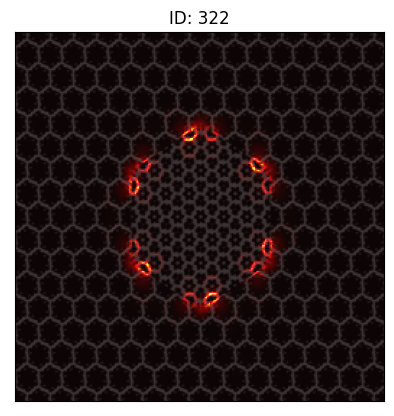

(Any[], Any[])

In [131]:
figure()
imshow(epsilon, alpha=0.9, cmap="gray")
pwrs = Matrix{Float64}[]
for i in 317:322
    title("ID: $i")
    pwr = h5open("./corner_charge_supercells/output/sg16/dim2-sg16-28080-res16-te-corner-dpwr.k01.b$i.te.h5", "r") do fid
        read(fid, "data-new")
    end
    push!(pwrs, pwr)
end
imshow(sum(pwrs), cmap="hot", alpha=0.8)
xticks([])
yticks([])

In [134]:
# Next we analyze sg13- c3 symmetry 

In [135]:
sg = 13; id_eps=3; mode="te"
dispersion_dir = "./dispersions/output/sg$sg/eps$(id_eps)/$mode/";
loaded_dispersion_data = load(dispersion_dir*"sg$sg-epsid$(id_eps)-res64-$mode.jld2")
marginsv = loaded_dispersion_data["marginsv"];
cumsummariesv = loaded_dispersion_data["cumsummariesv"];
dispersionsv = loaded_dispersion_data["dispersionsv"];

In [139]:
clad_dispersion = dispersionsv[9000]
bulk_dispersion = dispersionsv[3510];
kpoints = [collect(row) for row in eachrow(readdlm("./dispersions/output/sg13/eps3/te/dim2-sg13-23510-res64-te-dispersion.out", ',')[:, 2:4])]
gamma_idx = findall(x -> isapprox(x, [0.3333, 0.333, 0], atol=1e-3), kpoints)

1-element Vector{Int64}:
 17

In [142]:
bands_c3 = readdlm("./corner_charge_supercells/output/dim2-sg13-23510-res64-te-supercell-corner-dispersion-1.out", ',')[:, 6:end]

1×720 Matrix{Float64}:
 0.0  0.0482109  0.0482339  0.0484295  …  0.759571  0.759629  0.760088

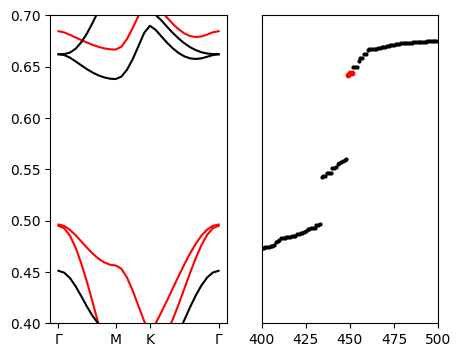

(Any[], Any[])

In [153]:
figure(figsize=(5, 4))
subplot(1, 2, 1)
plot(clad_dispersion, color="red")
plot(bulk_dispersion, color="black")
ylim(0.4, 0.7)
xticks([0, 10, 16, 28], ["Γ", "M", "K", "Γ"])
subplot(1, 2, 2)
scatter(1:720, bands_c3[1, :], s=4, color="black")
scatter(449:451, bands_c3[1, 449:451], s=10, color="red")

ylim(0.4, 0.7)
xlim(400, 500)
yticks([])

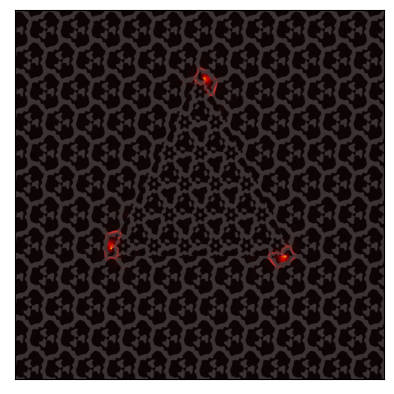

(Any[], Any[])

In [159]:
epsilon = []
epsilon = h5open("./corner_charge_supercells/output/sg13/dim2-sg13-23510-res64-te-corner-epsilon.h5", "r") do fid
    read(fid, "data-new")
end

figure()
imshow(epsilon, alpha=0.9, cmap="gray")
pwrs = Matrix{Float64}[]
for i in 449:451 
    pwr = h5open("./corner_charge_supercells/output/sg13/dim2-sg13-23510-res64-te-corner-dpwr.k01.b$i.te.h5", "r") do fid
        read(fid, "data-new")
    end
    push!(pwrs, pwr)
end
imshow(sum(pwrs), cmap="hot", alpha=0.8)
xticks([])
yticks([])

In [162]:
sg = 10; id_eps=3; mode="tm"
dispersion_dir = "./dispersions/output/sg$sg/eps$(id_eps)/$mode/";
loaded_dispersion_data = load(dispersion_dir*"sg$sg-epsid$(id_eps)-res64-$mode.jld2")
marginsv = loaded_dispersion_data["marginsv"];
cumsummariesv = loaded_dispersion_data["cumsummariesv"];
dispersionsv = loaded_dispersion_data["dispersionsv"];

In [186]:
bulk_dispersion = dispersionsv[3797];
bulk_summaries = cumsummariesv[3797];

In [171]:
kpoints = [collect(row) for row in eachrow(readdlm("./dispersions/output/sg10/eps3/tm/dim2-sg10-23510-res64-tm-dispersion.out", ',')[:, 2:4])];

In [193]:
bandsc4 = readdlm("./corner_charge_supercells/output/dim2-sg10-23797-res16-tm-supercell-corner-dispersion-1.out", ',')[:, 6:end];

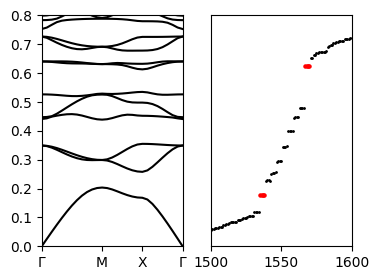

(Any[], Any[])

In [206]:
figure(figsize=(4, 3))
subplot(1, 2, 1)
plot(bulk_dispersion, color="black")
ylim(0, 0.8)
xticks([0, 12, 20, 28], ["Γ", "M", "X", "Γ"])
xlim(0, 28)
subplot(1, 2, 2)
scatter(1:2048, bandsc4, s=1, color="black")
scatter(1535:1538, bandsc4[1535:1538], s=5, color="red")
scatter(1567:1570, bandsc4[1567:1570], s=5, color="red")
ylim(0.53, 0.63)
xlim(1500, 1600)
yticks([])


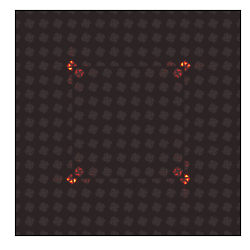

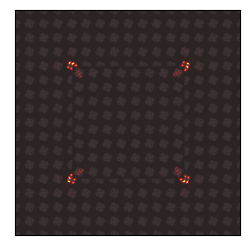

(Any[], Any[])

In [216]:
epsilon = []
epsilon = h5open("./corner_charge_supercells/output/sg10/dim2-sg10-23797-res16-tm-corner-epsilon.h5", "r") do fid
    read(fid, "data")
end
figure()
subplot(1, 2, 1)
imshow(epsilon, alpha=0.3, cmap="gray")

pwrs = Matrix{Float64}[]
for i in 1535:1538 #360:412
    pwr = h5open("./corner_charge_supercells/output/sg10/dim2-sg10-23797-res16-tm-corner-dpwr.k01.b$i.tm.h5", "r") do fid
        read(fid, "data")
    end
    push!(pwrs, pwr)
end
imshow(sum(pwrs), cmap="hot", alpha=0.8)
xticks([])
yticks([])


figure()
subplot(1, 2, 2)
imshow(epsilon, alpha=0.3, cmap="gray")

pwrs = Matrix{Float64}[]
for i in 1567:1570 #360:412
    pwr = h5open("./corner_charge_supercells/output/sg10/dim2-sg10-23797-res16-tm-corner-dpwr.k01.b$i.tm.h5", "r") do fid
        read(fid, "data")
    end
    push!(pwrs, pwr)
end
imshow(sum(pwrs), cmap="hot", alpha=0.8)
xticks([])
yticks([])

